In [8]:
!pip install --upgrade imageio
!pip install imageio




## BASICS


1. Load “8” image, file “data/eight.tif”, and simply change the value of pixels so you have what looks like a 5 instead of an 8. Display the image and print out the matrix (ie, array) as well.

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


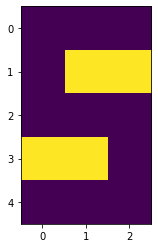

[[0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

image = imageio.imread('eight.tif')
plt.imshow(image)

# Convert the image to a numpy array
img_array = np.array(image)
print(img_array)

# Change the pixel values to resemble a 5
img_array[1,2] = 1
img_array[3,0] = 1

# Display the modified image
plt.imshow(img_array)
plt.show()

# Print out the matrix
print(img_array)

2. Suppose we represent colours as triplets (R,G,B) of integer values between [0:255], what are the following colours:
- a. (255, 0, 0) = **RED** 
- b. (0, 255, 0) = **LIME**
- c. (0, 0, 255) = **BLUE**
- d. (255, 255, 255) = **WHITE**
- e. (0, 0, 0) = **BLACK** 
- f. (128, 128, 128) = **GRAY**

3. How many colours can be represented in a 24-bit RGB system? 
- **16 MILLION COLOURS**

## WORKING WITH NUMPY

1. Turn the (white) background of image “data/sudoku.png” into gray.

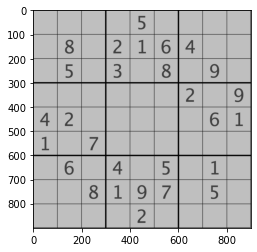

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

image = imageio.imread('sudoku.png')
plt.imshow(image)

image[image > 0] = 128
plt.imshow(image)

2. Consider image “data/maize-root-cluster.jpg”, clip the roots/plant from the (larger) image, display it, and save it as “data/clip.tif”.

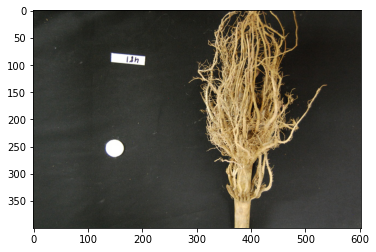

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

image = imageio.imread('maize-root-cluster.jpg')
plt.imshow(image)
clip = image[]

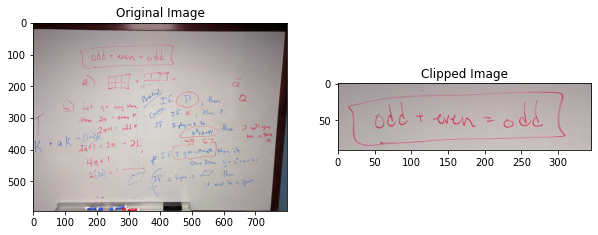

In [28]:
import imageio

# Load the image file
filename = "board.jpg"
image = imageio.imread(uri=filename)

# Clip a portion of the image
clip = image[60:151, 135:481, :]

# Save the clipped image as a separate file
clip_filename = "clipped_image.jpg"
imageio.imwrite(uri=clip_filename, im=clip)

# Display the original and clipped images side by side
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[1].imshow(clip)
axes[1].set_title("Clipped Image")
plt.show()

In [29]:
import imageio

# Load the original image file
filename = "board.jpg"
image = imageio.imread(uri=filename)

# Load the clipped image file
clip_filename = "clipped_image.jpg"
clip = imageio.imread(uri=clip_filename)

# Add the clipped part to the small clipped image from the original one
clip_part = image[60:151, 135:481, :]
clip[20:111, 20:366, :] = clip_part

# Save the resulting image as a separate file
result_filename = "result_image.jpg"
iio.imwrite(uri=result_filename, im=clip)

# Display the original, clipped, and resulting images side by side
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[1].imshow(clip)
axes[1].set_title("Clipped Image")
axes[2].imshow(iio.imread(uri=result_filename))
axes[2].set_title("Resulting Image")
plt.show()

ValueError: could not broadcast input array from shape (91,346,3) into shape (71,326,3)

3. Make the colour histogram (ie, counts for R, G, and B, in the same) of image “data/tree.jpg”.

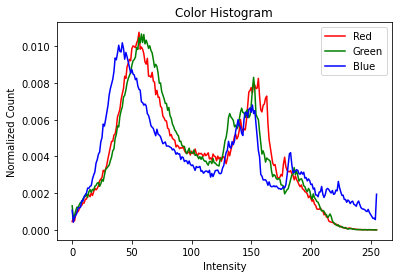

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image = Image.open('tree.jpg')

# Convert the image to a numpy array
image_array = np.array(image)

# Calculate the histogram for each color channel
r_hist, bins = np.histogram(image_array[:,:,0], bins=256, range=(0, 256), density=True)
g_hist, bins = np.histogram(image_array[:,:,1], bins=256, range=(0, 256), density=True)
b_hist, bins = np.histogram(image_array[:,:,2], bins=256, range=(0, 256), density=True)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the histograms for R, G, and B
ax.plot(r_hist, color='red', label='Red')
ax.plot(g_hist, color='green', label='Green')
ax.plot(b_hist, color='blue', label='Blue')

# Set the axis labels and title
ax.set_xlabel('Intensity')
ax.set_ylabel('Normalized Count')
ax.set_title('Color Histogram')

# Add a legend
ax.legend()

# Show the plot
plt.show()

## BLURRING AND THRESHOLDING

1. Try the Gaussian filter function from Skimage. See the (visual) effects of different combinations of ‘sigma’, ‘truncate’, ‘multichannel’ parameters using “gaussian-original.png” image.

/var/folders/yp/2ryvq6y108v4097f78831pz40000gn/T/ipykernel_63936/1486303525.py:10: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  filtered_image = filters.gaussian(image, sigma=sigma, truncate=truncate, multichannel=multichannel)


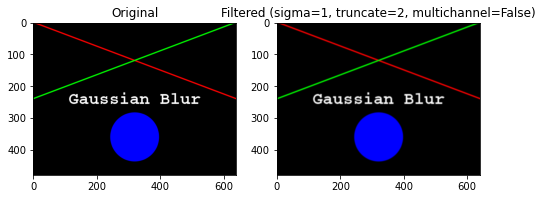

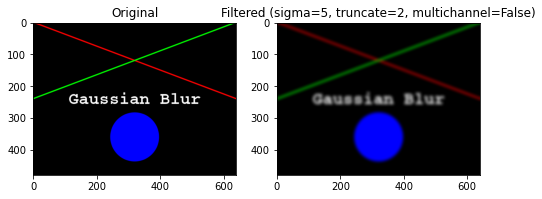

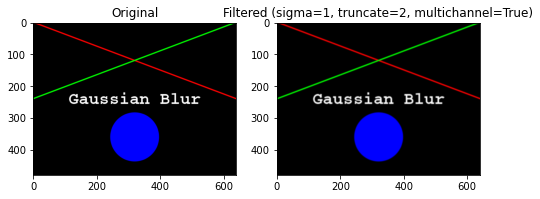

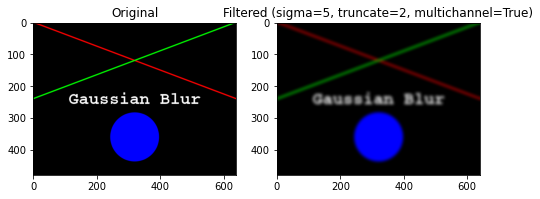

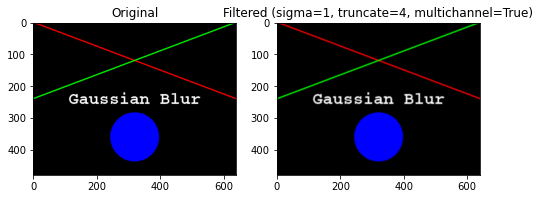

In [39]:
import matplotlib.pyplot as plt
from skimage import io, filters

# Load the image
image = io.imread('gaussian-original.png')

# Define a function to apply the Gaussian filter with different parameters
def apply_gaussian_filter(image, sigma, truncate, multichannel):
    # Apply the Gaussian filter to the image
    filtered_image = filters.gaussian(image, sigma=sigma, truncate=truncate, multichannel=multichannel)

    # Plot the original and filtered images
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(image)
    ax[0].set_title('Original')
    ax[1].imshow(filtered_image)
    ax[1].set_title('Filtered (sigma={}, truncate={}, multichannel={})'.format(sigma, truncate, multichannel))
    plt.show()

# Experiment with different combinations of parameters
apply_gaussian_filter(image, sigma=1, truncate=2, multichannel=False)
apply_gaussian_filter(image, sigma=5, truncate=2, multichannel=False)
apply_gaussian_filter(image, sigma=1, truncate=2, multichannel=True)
apply_gaussian_filter(image, sigma=5, truncate=2, multichannel=True)
apply_gaussian_filter(image, sigma=1, truncate=4, multichannel=True)

2. Create a black/white image (aka, binary image) using thresholding method to separate the objects (True) from the background (False) in image “data/shapes-02.jpg”.

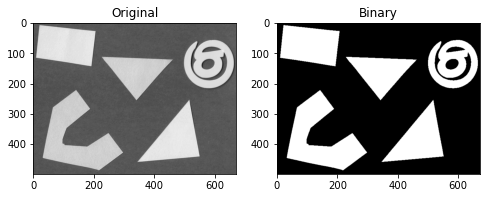

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology

# Load the image and convert it to grayscale
image = io.imread('shapes-02.jpg', as_gray=True)

# Apply a threshold to the image
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# Clean up the binary image by removing small objects
binary_image = morphology.remove_small_objects(binary_image, min_size=10)

# Display the original and binary images side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title('Binary')
plt.show()

# Save the binary image
io.imsave('binary.png', np.uint8(binary_image)*255)

3. Create a black/white image (aka, mask) to separate (foreground) bacteria colonies from the background in image “colonies-1.tif”:
- Using a manually defined (through histogram) “t” value;
- Using an automatically defined “t” value through Otsu’s method.

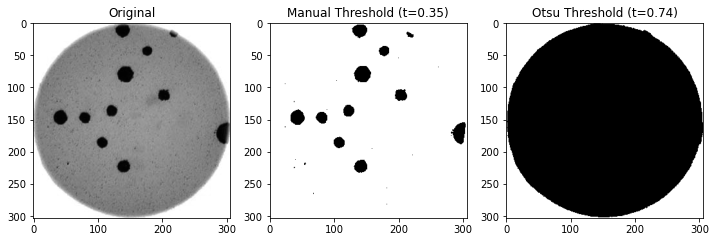

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

# Load the image and convert it to grayscale
image = io.imread('colonies-01.tif', as_gray=True)

# Define a manually chosen threshold value (t)
t = 0.35

# Threshold the image using the manually chosen value
binary_image_manual = image > t

# Threshold the image using Otsu's method
threshold_value_otsu = filters.threshold_otsu(image)
binary_image_otsu = image > threshold_value_otsu

# Display the original and binary images side by side
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(binary_image_manual, cmap='gray')
ax[1].set_title('Manual Threshold (t={:.2f})'.format(t))
ax[2].imshow(binary_image_otsu, cmap='gray')
ax[2].set_title('Otsu Threshold (t={:.2f})'.format(threshold_value_otsu))
plt.show()

# Save the binary image using Otsu's method
io.imsave('colonies-1-binary.tif', np.uint8(binary_image_otsu)*255)

## CONNECTED COMPONENT ANALYSIS

1. How many objects/regions would be defined in the following image/array, using

a. 4-neighborhood (1-jump) strategy? **It would define 5 objects/regions:**

- Region 1: (1, 1), (1, 5), (1, 6)
- Region 2: (2, 5), (2, 6)
- Region 3: (3, 3)
- Region 4: (4, 2), (4, 4), (4, 5)
- Region 5: (5, 2), (5, 4)

b. 8-neighborhood (2-jumps) strategy? **It would define 4 objects/regions:**

- Region 1: (1, 1), (1, 5), (1, 6)
- Region 2: (2, 5), (2, 6)
- Region 3: (3, 3), (4, 2), (4, 4), (4, 5), (5, 2), (5, 4)
- Region 4: (3, 2)

2. Re-apply the segmentation and labelling steps we saw in the “Segmentation/Object Identification” slides but, now, before transforming the labelled image into RGB (‘label2rgb’), re-label the objects in (a copy of) the image using their respective areas.

3. Also, does the number of objects detected match your expectations? Why, and how to fix it?

## CAPSTONE CHALLENGE

In [33]:
import numpy as np
import skimage.color
import skimage.filters
import matplotlib.pyplot as plt
import ipympl
%matplotlib widget

bacteria_image = imageio.imread(uri="data/colonies-01.tif")

# display the image
fig, ax = plt.subplots()
plt.imshow(bacteria_image)
gray_bacteria = skimage.color.rgb2gray(bacteria_image)

# display the gray image
fig, ax = plt.subplots()
plt.imshow(gray_bacteria, cmap="gray")
blurred_image = skimage.filters.gaussian(gray_bacteria, sigma=1.0)
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
mask = blurred_image < 0.2
fig, ax = plt.subplots()
plt.imshow(mask, cmap="gray")
labeled_image, count = skimage.measure.label(mask, return_num=True)
print(count)

# color each of the colonies a different color
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
# give our grayscale image rgb channels, so we can add the colored colonies
summary_image = skimage.color.gray2rgb(gray_bacteria)
summary_image[mask] = colored_label_image[mask]

# plot overlay
fig, ax = plt.subplots()
plt.imshow(summary_image)

ModuleNotFoundError: No module named 'ipympl'